# EXPLANATORY DATA ANALYSIS ON OLUSOLA INSURANCE COMPANY

This challenge was designed by Data Science Nigeria specifically for the DSN Bootcamp 2018, which takes place 19-24 November 2019. Welcome to the DSN participants!


<u><b>Description of the challenge:</b></u>

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:

<li>1 if the building has at least a claim over the insured period.</li>
<li>0 if the building doesn’t have a claim over the insured period.</li>

This competition was Hosted in https://zindi.africa/competitions/data-science-nigeria-2019-challenge-1-insurance-prediction 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

In [5]:
train = pd.read_csv('train_data.csv')
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


### Data Cleaning  

To conduct a proper Explanatory data analysis, the data in used must be properly cleaned. And this is done by filling neccesary missing values if need be, and adjusting other inconsistent variable in view. For this dataset, we have four columns with missing values ('Garden', 'Building Dimension', 'Date_of_Occupancy' and 'Geo_Code'). filling of missing values was done using their repective mode, the choice of filling with mode was my option not a rule,  you can always chose a better way of filling up missing values.

  Also for 'NumberOfWindows' one of it categories appears to be '   .', and this category was replace with 'unknown no of window'

In [6]:
#checking for missing value
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
#handling missing values
value_fill = {'Garden': 'V', 'Building Dimension': 400, 'Date_of_Occupancy': 1960,'Geo_Code': 6088}
train.fillna(value = value_fill, inplace = True)

In [11]:
#cleaning up the number of windows column
train['NumberOfWindows'] = train['NumberOfWindows'].replace('   .', 'unknown no of window')

### Checking for the distribution of Conntinous Variables

using train.info() to check for variables datatypes, we have 7 variabele with int/float datatype, a critical look into the  features, we 5 features that are categorical in description.

YearOfObservation - categorical
Residential - categorical
Building_Type - categorical
Date_of_Occupancy - categorical
Claim - categorical [Response variable]

Hence our focus would be on
Insured_Period and Building Dimension

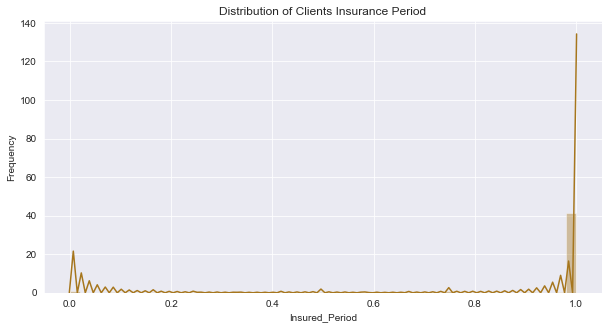

In [33]:
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style('darkgrid')
sns.set_palette('Dark2_r')
sns.distplot(train['Insured_Period'])
plt.ylabel('Frequency')
plt.title('Distribution of Clients Insurance Period');

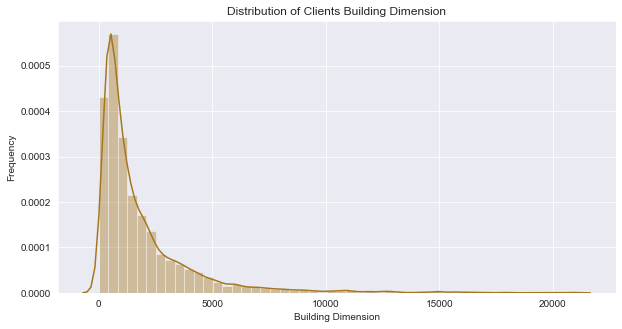

In [34]:
sns.distplot(train['Building Dimension'],hist = True, kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of Clients Building Dimension');

<B>COMMENT</b>:
from the above graph we can see that clients building dimension are not normally distributed, also for the insurance peroid output, it appears that clients insurance period are uniformly distributed with noticable ouliers around (0.0 and 1.0), showing that we have majority of the client insurance period clustered around (0 and 1)

### Deriving Insight from the dataset by answering few possible questions graphically

So below are questions we want to ask, and see if we can get possible Answers from the dataset provided:

1. Which year has the highest number of client requesting for insurance claim?
2. What kind of building type is requesting for an insurance claim?
3. Are client in the rural settlement requesting for insurance claim compared to client in the urban settlement?


This are few of the questions you can ask before building a model to help predict which client would request for an insurance claim given the stated features.
so at your leisure you can explore other questions

Also you can chose to explore the distribution of the categorical variables using a boxplot or voilinplot on seaborn

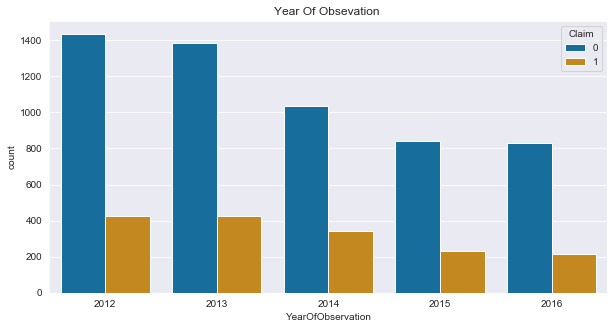

In [42]:
#What Year has the highest number of client requesting for an insurance Claim?
sns.countplot('YearOfObservation', hue = 'Claim', data = train, palette = 'colorblind' )
plt.title("Year Of Obsevation ");

<b>COMMENT:</b>
It appears that year 2012 and 2013 has the highest count of insurance claim compared to other year of observation, and this can lead to further investigation, one can try to check for features leading to this claim for both years

Note: You might want to report the count figure,   

train['YearOfObservation'].value_counts() should give you the count in figure

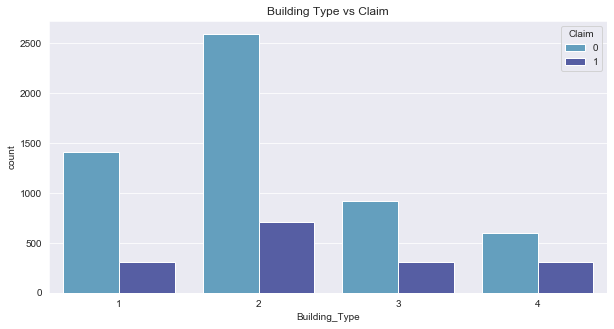

In [60]:
#What kind of building type is requesting for an insurance claim?
sns.set_palette('icefire')
sns.countplot('Building_Type', hue = 'Claim', data = train)
plt.title('Building Type vs Claim');

From the above Count plot Building_type_2 appears to be the building with the highest insurance claim compared to other building type

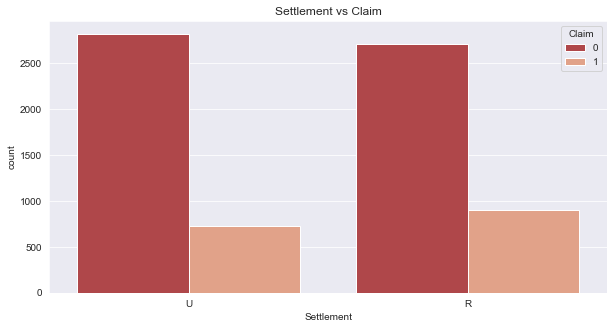

In [63]:
sns.set_palette('RdBu')
sns.countplot('Settlement', hue = 'Claim', data = train)
plt.title('Settlement vs Claim');

Its appears that buildings in the rural settlement request for insurance claimm comapred to buildings in the urban settlement

Note: Other variables can be Explore for proper insights before building a model